In [182]:
import pandas as pd
import numpy as np

import plotly.express as px
import plotly.graph_objects as go

import matplotlib.pyplot as plt
import matplotlib.ticker as tk

import matplotlib.animation as animation
from IPython.display import HTML

In [183]:
df=pd.read_csv('datasets/Forbes Richest Atheletes (Forbes Richest Athletes 1990-2020).csv')

In [184]:
df = df.rename(columns = {"earnings ($ million)":"Pay"},inplace=False)

In [185]:
df.head(10)

,S.NO,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,Pay
0,1,Mike Tyson,USA,1,NaN,boxing,1990,28.6
1,2,Buster Douglas,USA,2,NaN,boxing,1990,26.0
2,3,Sugar Ray Leonard,USA,3,NaN,boxing,1990,13.0
3,4,Ayrton Senna,Brazil,4,NaN,auto racing,1990,10.0
4,5,Alain Prost,France,5,NaN,auto racing,1990,9.0
5,6,Jack Nicklaus,USA,6,NaN,golf,1990,8.6
6,7,Greg Norman,Australia,7,NaN,golf,1990,8.5
7,8,Michael Jordan,USA,8,NaN,basketball,1990,8.1
8,9,Arnold Palmer,USA,8,NaN,golf,1990,8.1
9,10,Evander Holyfield,USA,8,NaN,boxing,1990,8.1


In [186]:
df.isna().sum()

S.NO                   0
Name                   0
Nationality            0
Current Rank           0
Previous Year Rank    24
Sport                  0
Year                   0
Pay                    0
dtype: int64

In [187]:
df.fillna(0,inplace=True)

In [188]:
df.shape

(301, 8)

In [189]:
df['Nationality'].unique()

array(['USA', 'Brazil', 'France', 'Australia', 'Canada', 'UK', 'Austria',
       'Germany', 'Russia', 'Italy', 'Finland', 'Switzerland',
       'Philippines', 'Portugal', 'Dominican', 'Argentina', 'Filipino',
       'Spain', 'Serbia', 'Northern Ireland', 'Ireland', 'Mexico'],
      dtype=object)

In [190]:
df1 = df.sort_values('Pay',ascending=False).head(10)


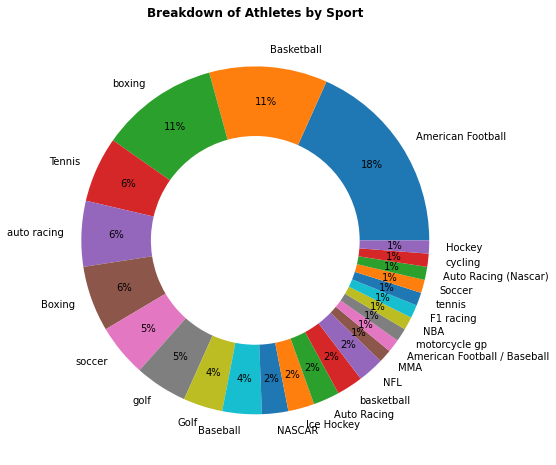

In [191]:
df.groupby("Name").first()["Sport"].value_counts().plot(kind="pie",autopct="%.0f%%",figsize=(8,8),wedgeprops=dict(width=0.4),pctdistance=0.8)
plt.ylabel(None)
plt.title("Breakdown of Athletes by Sport",fontweight="bold")
plt.show()

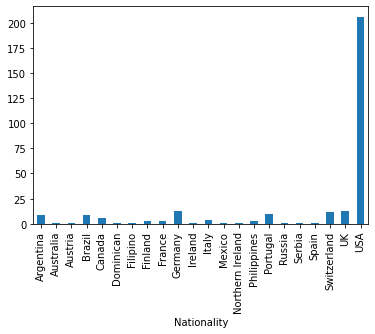

In [192]:
df.groupby('Nationality').size().plot(kind='bar')
plt.show()

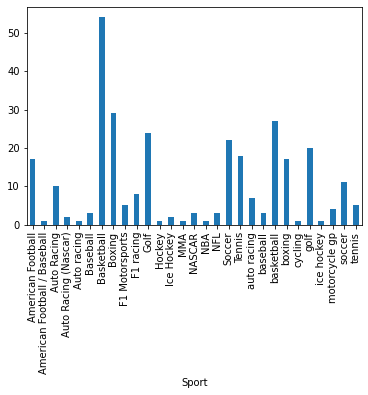

In [193]:
df.groupby('Sport').size().plot(kind='bar')
plt.show()

In [194]:
def top_list(key, list_len):
    countries = df.groupby(df[key].str.upper())
    return countries[key].count()\
                .reset_index(name='Count')\
                .sort_values(['Count'], ascending=0)\
                .head(list_len)

df_countries = top_list( 'Nationality', 10 )
df_countries

,Nationality,Count
21,USA,206
9,GERMANY,13
20,UK,13
19,SWITZERLAND,12
15,PORTUGAL,10
0,ARGENTINA,9
3,BRAZIL,9
4,CANADA,6
11,ITALY,4
7,FINLAND,3


In [209]:
px.pie(df_countries, 'Nationality', 'Count', 
       color_discrete_sequence=px.colors.sequential.Viridis, 
       title=" Nation's Athletes on the Forbes List between 1990-2020")

In [196]:
df_sports = top_list( 'Sport', 10 )
df_sports

,Sport,Count
5,BASKETBALL,81
6,BOXING,46
10,GOLF,44
18,SOCCER,33
19,TENNIS,23
2,AUTO RACING,18
0,AMERICAN FOOTBALL,17
9,F1 RACING,8
4,BASEBALL,6
8,F1 MOTORSPORTS,5


In [208]:
px.pie(df_sports, 'Sport', 'Count', 
       color_discrete_sequence=px.colors.sequential.Cividis, 
       title="Forbes List between 1990-2020")


In [198]:
Top_paid_each_year = df[df['Current Rank'] == 1].sort_values(by='Year',ascending=False)
z = Top_paid_each_year[['Name','Sport','Nationality','Pay']]
z.style.background_gradient(cmap='Reds')

,Name,Sport,Nationality,Pay
291,Roger Federer,Tennis,Switzerland,106.300000
281,Lionel Messi,Soccer,Argentina,127.000000
271,Floyd Mayweather,Boxing,USA,285.000000
261,Cristiano Ronaldo,Soccer,Portugal,93.000000
251,Cristiano Ronaldo,Soccer,Portugal,88.000000
241,Floyd Mayweather,Boxing,USA,300.000000
231,Floyd Mayweather,Boxing,USA,105.000000
221,Tiger Woods,Golf,USA,78.100000
211,Floyd Mayweather,Boxing,USA,85.000000
201,Tiger Woods,golf,USA,75.000000


In [210]:
counts_top = Top_paid_each_year['Name'].value_counts().to_frame()


trace = go.Bar(
                    y = counts_top.index,
                    x = counts_top['Name'] ,
                    orientation='h',
                    marker = dict(color='pink',
                                 line=dict(color='black',width=1)),
                    )
data = [trace]
layout = go.Layout(barmode = "group",title='Athlete earning the most maximum number of times',width=800, height=500, 
                       xaxis= dict(title='High Rank'),
                       yaxis=dict(autorange="reversed"),
                       showlegend=False)
fig = go.Figure(data = data ,layout = layout)
fig

In [211]:
trace = go.Scatter(
                    x = Top_paid_each_year['Year'],
                    y = Top_paid_each_year['Pay'] ,
                    orientation='v',
                    marker = dict(color='red',
                                 line=dict(color='royalblue',width=2)),
                    )
df = [trace]
layout = go.Layout(title='Top Paid Athlete for Each Year',width=800, height=500, 
                       xaxis= dict(title='Year'),
                       yaxis=dict(title="Earning in US Dollars(million)"),
                       showlegend=False)
fig = go.Figure(data = df, layout = layout)
fig.show()